In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plays_df = pd.read_csv('plays-2.csv')
games_df = pd.read_csv('games.csv')
players_df = ('players.csv')

# Overall Takeaways 

Plays.csv:
- The first and fourth quarters have the highest number of plays, suggesting teams might be more aggressive at the beginning and end of games
- Most plays result in a small yardage gain with a few plays gaining a significant number of yards
- The average penalty yards on plays with penalties is about 9.48 yards
- The majority of plays happen on the 1st and 2nd downs with a noticeable decrease in the number of plays on the 3rd and 4th downs
- On average, Complete, Incomplete, and Scramble plays (throwing team keeps it) result in a gain of approximately 10.26 yards
- Sack / Intercepted plays (throwing team loses it) result in an average gain of approximately 4.31 yards.
- There seems to be a trend of longer plays occurring on earlier downs, as indicated by the negative correlation between 'down' and 'playResult'.
- The red zone often sees a high occurrence of plays with minimal yard gains 

Games.csv:
- Scores for most games typically range from 15 to 30 points for both home and visiting teams.
- Home teams usually have a slight scoring advantage over visiting teams
- The distribution of score differences (home score minus visitor score) suggests many games are close
- The KC perform well at home but less impressively when away
- The Bills are good in away games but are not as dominant at home

Players.csv:
- The dataset is mostly WR and CB


# PLAYERS 

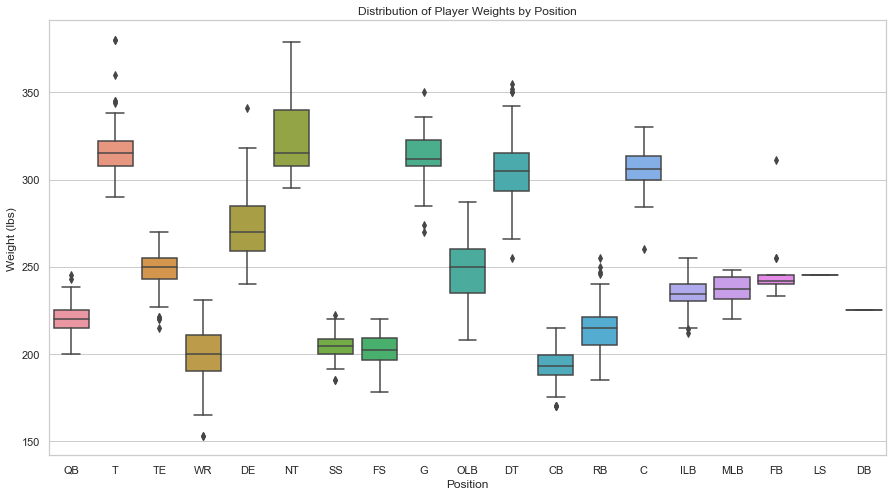

In [86]:
# boxplot of player weights by position
plt.figure(figsize=(15, 8))
sns.boxplot(x='position', y='weight', data=players_df)

plt.title('Distribution of Player Weights by Position')
plt.xlabel('Position')
plt.ylabel('Weight (lbs)')

plt.show()

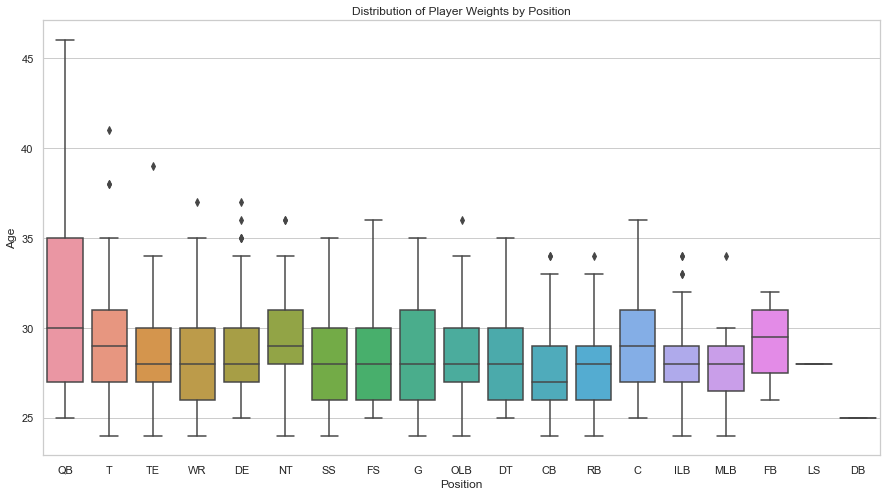

In [88]:
# boxplot of player age by position
plt.figure(figsize=(15, 8))
sns.boxplot(x='position', y='age', data=players_df)

plt.title('Distribution of Player Weights by Position')
plt.xlabel('Position')
plt.ylabel('Age')

plt.show()

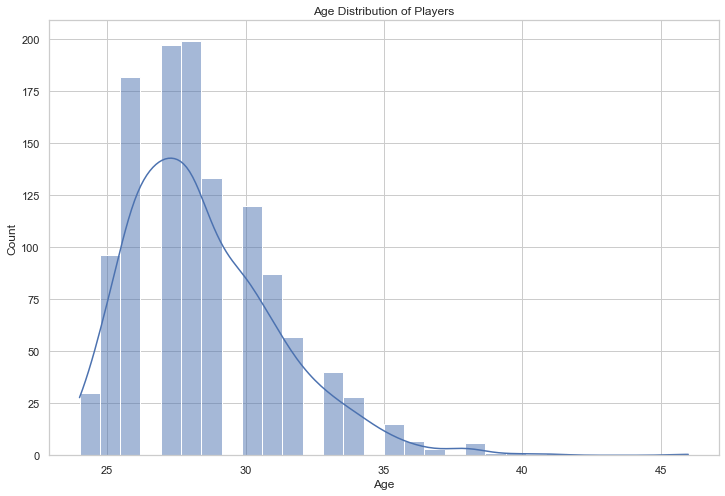

In [83]:
# Age Distribution 
plt.figure(figsize=(12, 8))
sns.histplot(players_df['age'], bins=30, kde=True)
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


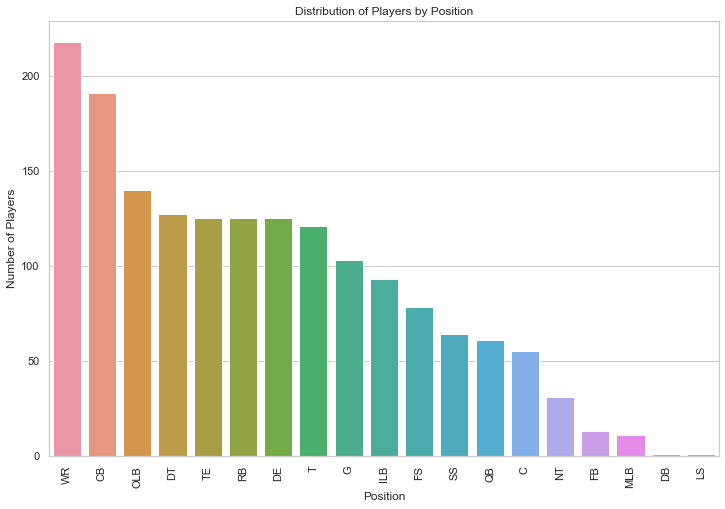

In [89]:
# Position amounts
plt.figure(figsize=(12, 8))
sns.countplot(data=players_df, x='position', order=players_df['position'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Players by Position')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.show()

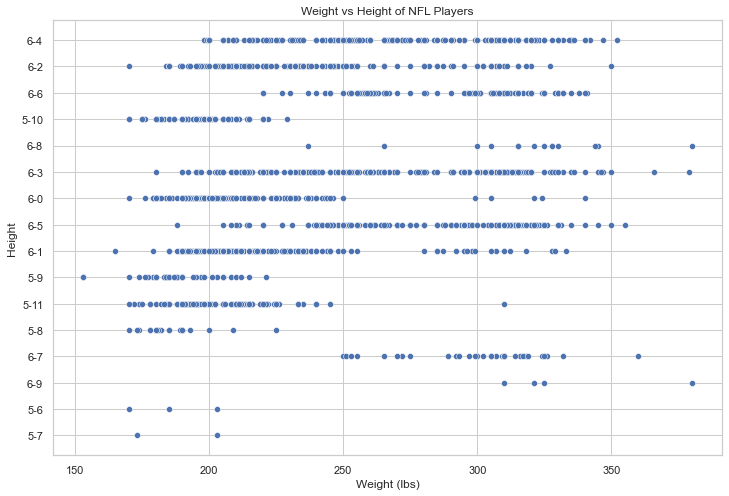

In [90]:
# Weight vs Height 
plt.figure(figsize=(12, 8))
sns.scatterplot(data=players_df, x='weight', y='height')
plt.title('Weight vs Height of NFL Players')
plt.xlabel('Weight (lbs)')
plt.ylabel('Height')
plt.show()

# PLAYS

In [30]:
plays_summary = plays_df.describe()
plays_summary

,gameId,playId,ballCarrierId,quarter,down,yardsToGo,yardlineNumber,preSnapHomeScore,preSnapVisitorScore,passLength,...,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulNFLId1,foulNFLId2
count,1.248600e+04,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,5634.000000,...,12481.000000,12149.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12485.000000,592.000000,25.00000
mean,2.022099e+09,1986.603476,48072.271664,2.550136,1.727054,8.469085,29.573122,11.170671,9.862967,5.455982,...,6.424085,0.603845,0.556236,0.443764,0.000110,-0.000110,2.258360,0.297367,47759.856419,50000.56000
std,5.953106e+03,1174.657363,4648.681597,1.136714,0.793536,3.927737,12.446971,9.442045,9.142307,8.258211,...,1.014728,0.237096,0.287751,0.287751,0.036748,0.036748,1.619769,1.194641,5010.592593,3494.05977
min,2.022091e+09,54.000000,25511.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-9.000000,...,1.000000,0.005607,0.001049,0.000825,-0.521181,-0.471527,-2.366872,-9.986150,33107.000000,43586.00000
25%,2.022093e+09,954.000000,44860.000000,2.000000,1.000000,6.000000,21.000000,3.000000,0.000000,0.000000,...,6.000000,0.447226,0.331557,0.207915,-0.011382,-0.011799,1.055965,-0.437525,43572.750000,47790.00000
50%,2.022101e+09,1990.500000,47789.000000,3.000000,2.000000,10.000000,30.000000,10.000000,7.000000,4.000000,...,6.000000,0.584451,0.585621,0.414379,0.000008,-0.000008,2.031321,0.112532,47793.500000,48089.00000
75%,2.022102e+09,2989.000000,52733.000000,4.000000,2.000000,10.000000,40.000000,17.000000,16.000000,9.000000,...,7.000000,0.792913,0.792085,0.668443,0.011799,0.011382,3.451942,0.899947,53063.000000,52553.00000
max,2.022111e+09,5096.000000,55158.000000,5.000000,4.000000,38.000000,50.000000,49.000000,48.000000,61.000000,...,11.000000,0.996206,0.999175,0.998951,0.471527,0.521181,6.558894,8.698986,55157.000000,54650.00000


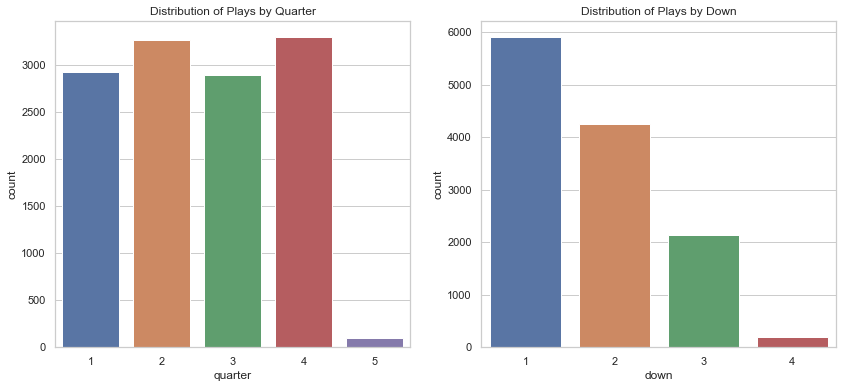

In [8]:
# Plays by Quarter
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='quarter', data=plays_df)
plt.title('Distribution of Plays by Quarter')

plt.subplot(1, 2, 2)
sns.countplot(x='down', data=plays_df)
plt.title('Distribution of Plays by Down')

plt.show()

In [22]:
keptinteam = plays_df[plays_df['passResult'].isin(['C', 'I', 'R'])]  # Complete, Incomplete, Scramble 
otherteamgotit = plays_df[~plays_df['passResult'].isin(['IN', 'S'])]  # Sack, Intercepted

avg_yards_before_tackle_keptinteam = pass_plays['playResult'].mean()
avg_yards_before_tackle_otherteamgotit = run_plays['playResult'].mean()

avg_yards_before_tackle_keptinteam, avg_yards_before_tackle_otherteamgotit


(10.26027846027846, 7.218564792567676)

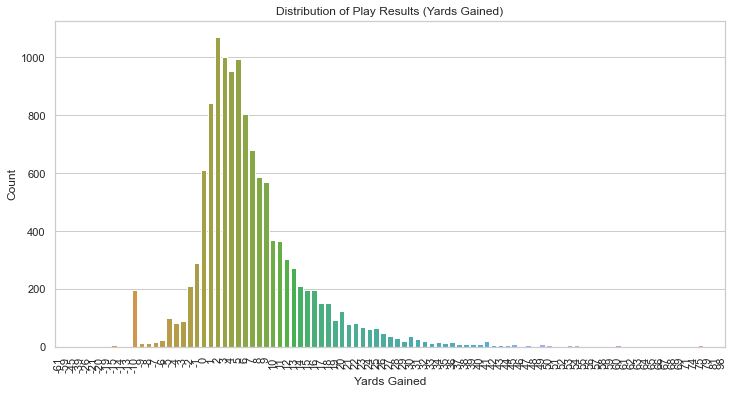

In [23]:
# Distribution of play results
plt.figure(figsize=(12, 6))
sns.countplot(data=plays_df, x='playResult')
plt.title('Distribution of Play Results (Yards Gained)')
plt.xlabel('Yards Gained')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


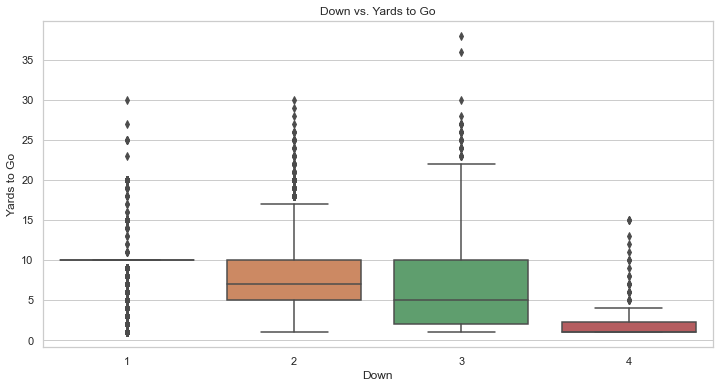

In [49]:
# Down and Distance
plt.figure(figsize=(12, 6))
sns.boxplot(x='down', y='yardsToGo', data=plays_df)
plt.title('Down vs. Yards to Go')
plt.xlabel('Down')
plt.ylabel('Yards to Go')
plt.show()

In [53]:
# Penalties
penalty_plays = plays_df[plays_df['penaltyYards'] > 0]
penalty_impact = penalty_plays['penaltyYards'].mean()

print(f"Average Penalty Yards: {penalty_impact:.2f} yards")


Average Penalty Yards: 9.48 yards


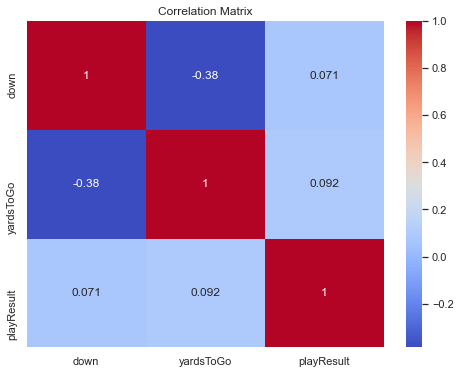

In [52]:
# Correlation Analysis
correlation_matrix = plays_df[['down', 'yardsToGo', 'playResult']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

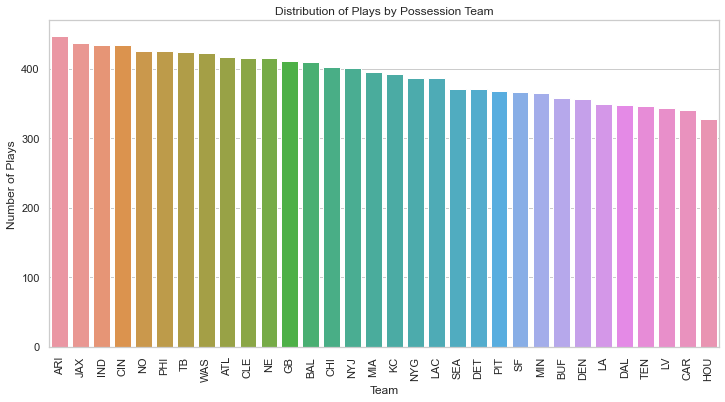

In [54]:
# Distribution of Plays by Team
plt.figure(figsize=(12, 6))
sns.countplot(x='possessionTeam', data=plays_df, order=plays_df['possessionTeam'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Plays by Possession Team')
plt.xlabel('Team')
plt.ylabel('Number of Plays')
plt.show()

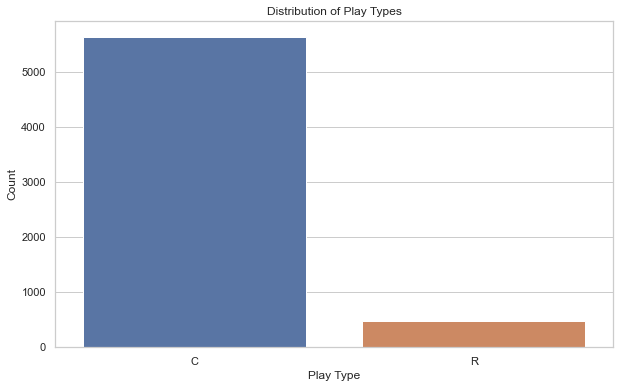

In [55]:
# Distribution of Play Types
plt.figure(figsize=(10, 6))
sns.countplot(x='passResult', data=plays_df)
plt.title('Distribution of Play Types')
plt.xlabel('Play Type')
plt.ylabel('Count')
plt.show()

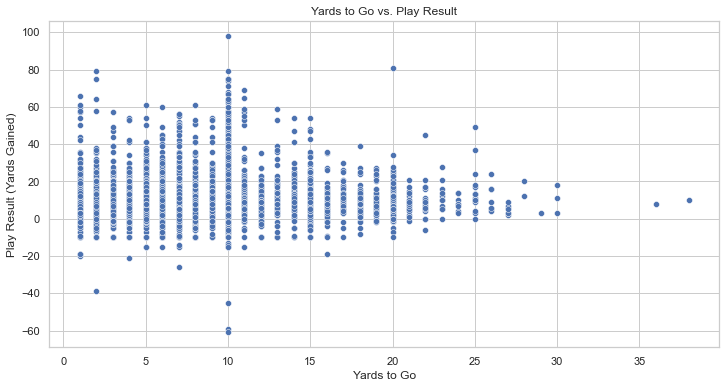

In [56]:
# Yards to Go vs. Play Result
plt.figure(figsize=(12, 6))
sns.scatterplot(x='yardsToGo', y='playResult', data=plays_df)
plt.title('Yards to Go vs. Play Result')
plt.xlabel('Yards to Go')
plt.ylabel('Play Result (Yards Gained)')
plt.show()

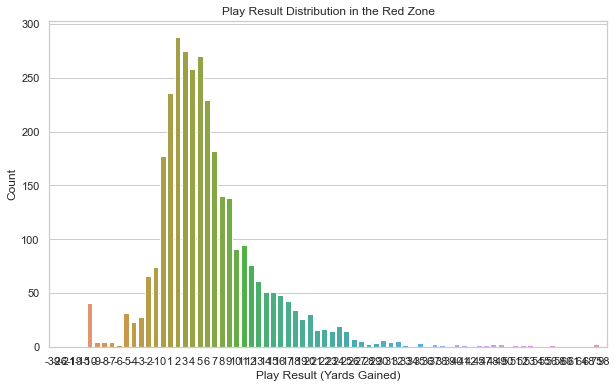

In [57]:
# Plays in Red Zone
red_zone_plays = plays_df[plays_df['absoluteYardlineNumber'] >= 80]
red_zone_play_dist = red_zone_plays['playResult'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=red_zone_play_dist.index, y=red_zone_play_dist.values)
plt.title('Play Result Distribution in the Red Zone')
plt.xlabel('Play Result (Yards Gained)')
plt.ylabel('Count')
plt.show()

# GAMES

games_df.info()

In [29]:
games_summary = games_df.describe()
games_summary

,gameId,season,week,homeFinalScore,visitorFinalScore
count,1.360000e+02,136.0,136.000000,136.000000,136.000000
mean,2.022099e+09,2022.0,4.845588,22.669118,20.948529
std,5.996614e+03,0.0,2.567254,8.659874,9.731446
min,2.022091e+09,2022.0,1.000000,3.000000,0.000000
25%,2.022093e+09,2022.0,3.000000,17.000000,14.750000
50%,2.022101e+09,2022.0,5.000000,22.500000,20.000000
75%,2.022102e+09,2022.0,7.000000,27.000000,27.000000
max,2.022111e+09,2022.0,9.000000,49.000000,48.000000


Text(0, 0.5, 'Frequency')

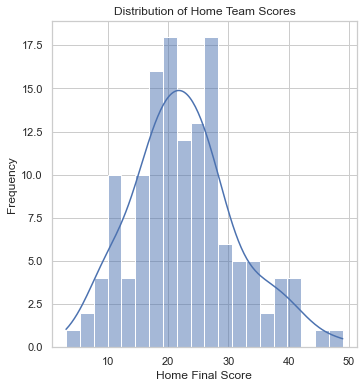

In [31]:

plt.figure(figsize=(12, 6))

# Histogram for home team scores
plt.subplot(1, 2, 1)
sns.histplot(games_df['homeFinalScore'], bins=20, kde=True)
plt.title('Distribution of Home Team Scores')
plt.xlabel('Home Final Score')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

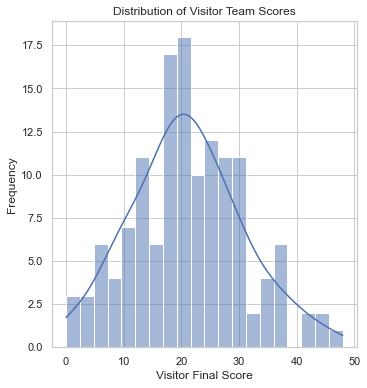

In [34]:
# Histogram for visitor team scores

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(games_df['visitorFinalScore'], bins=20, kde=True)
plt.title('Distribution of Visitor Team Scores')
plt.xlabel('Visitor Final Score')
plt.ylabel('Frequency')

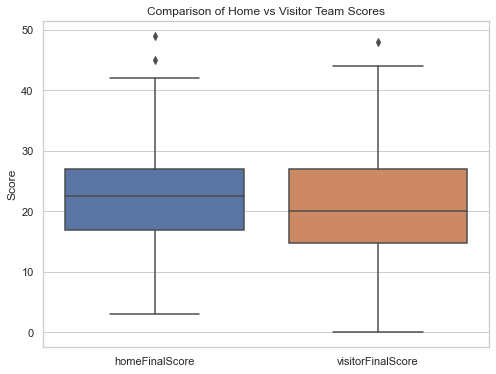

In [35]:
# comparing home and visitor team scores
plt.figure(figsize=(8, 6))
sns.boxplot(data=games_df[['homeFinalScore', 'visitorFinalScore']])
plt.title('Comparison of Home vs Visitor Team Scores')
plt.ylabel('Score')
plt.show()


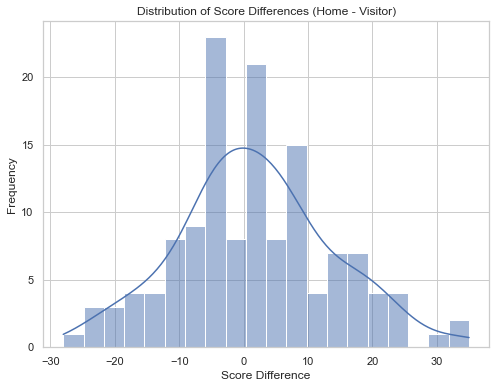

In [36]:
games_df['scoreDifference'] = games_df['homeFinalScore'] - games_df['visitorFinalScore']

# score differences
plt.figure(figsize=(8, 6))
sns.histplot(games_df['scoreDifference'], bins=20, kde=True)
plt.title('Distribution of Score Differences (Home - Visitor)')
plt.xlabel('Score Difference')
plt.ylabel('Frequency')
plt.show()

In [37]:
games_df['gameDate'] = pd.to_datetime(games_df['gameDate'])

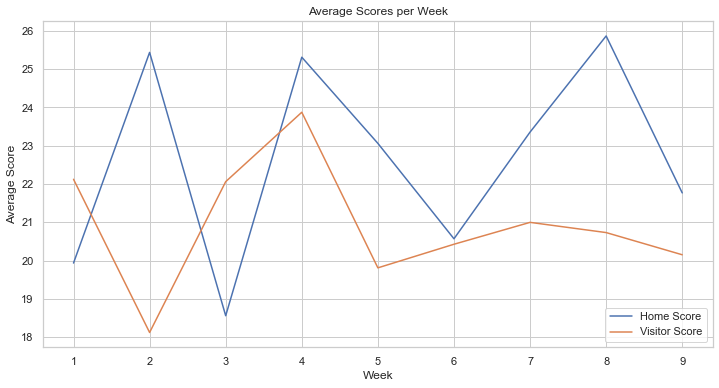

In [38]:
# scores over weeks
plt.figure(figsize=(12, 6))
sns.lineplot(data=games_df, x='week', y='homeFinalScore', label='Home Score', ci=None)
sns.lineplot(data=games_df, x='week', y='visitorFinalScore', label='Visitor Score', ci=None)
plt.title('Average Scores per Week')
plt.xlabel('Week')
plt.ylabel('Average Score')
plt.legend()
plt.show()

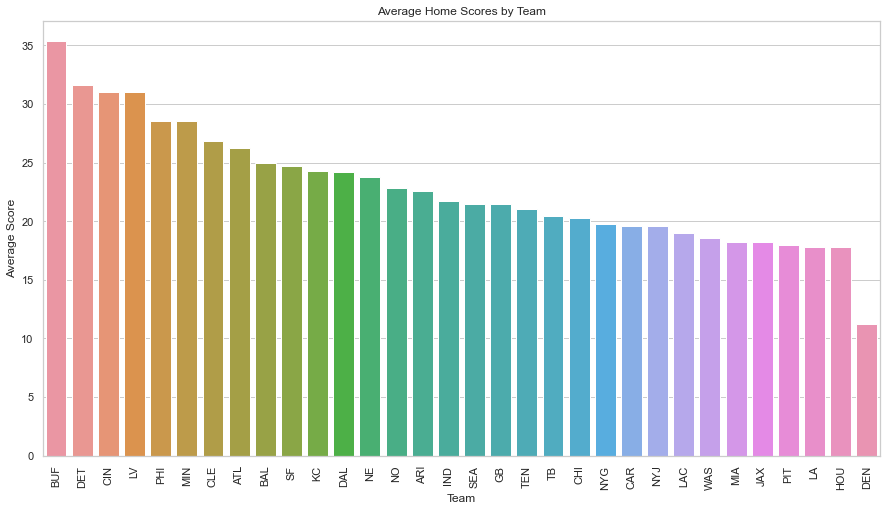

In [40]:
team_performance_home = games_df.groupby('homeTeamAbbr')['homeFinalScore'].mean().sort_values(ascending=False)
team_performance_visitor = games_df.groupby('visitorTeamAbbr')['visitorFinalScore'].mean().sort_values(ascending=False)

# team performance
plt.figure(figsize=(15, 8))
sns.barplot(x=team_performance_home.index, y=team_performance_home.values)
plt.title('Average Home Scores by Team')
plt.xlabel('Team')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()


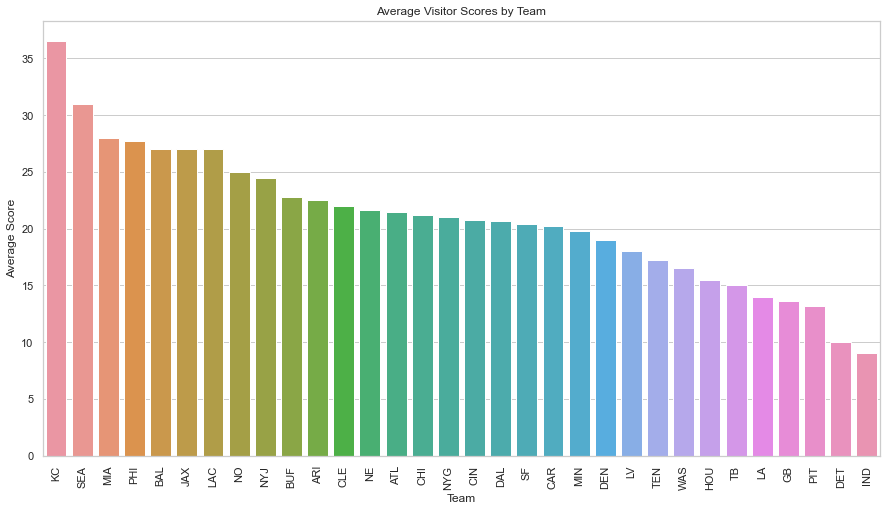

In [41]:
# Away
plt.figure(figsize=(15, 8))
sns.barplot(x=team_performance_visitor.index, y=team_performance_visitor.values)
plt.title('Average Visitor Scores by Team')
plt.xlabel('Team')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()

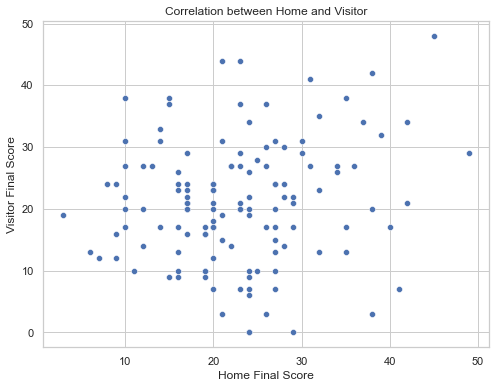

In [46]:
# Correlation between home and visitor scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x='homeFinalScore', y='visitorFinalScore', data=games_df)
plt.title('Correlation between Home and Visitor')
plt.xlabel('Home Final Score')
plt.ylabel('Visitor Final Score')
plt.show()


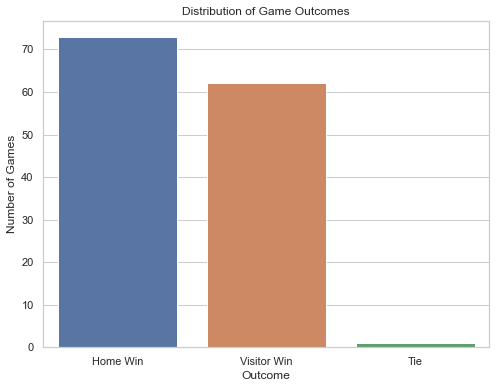

In [45]:
# game outcomes
games_df['outcome'] = 'Tie'
games_df.loc[games_df['homeFinalScore'] > games_df['visitorFinalScore'], 'outcome'] = 'Home Win'
games_df.loc[games_df['homeFinalScore'] < games_df['visitorFinalScore'], 'outcome'] = 'Visitor Win'

outcome_counts = games_df['outcome'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values)
plt.title('Distribution of Game Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Number of Games')
plt.show()